In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.0
 )
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.0
 )
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.0
 )

train_data_gen = train_image_generator.flow_from_directory(
        directory=train_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=batch_size,
        class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(
        directory=validation_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=batch_size,
        class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(
        directory=test_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=batch_size,
        classes=['.'],
        shuffle=False,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


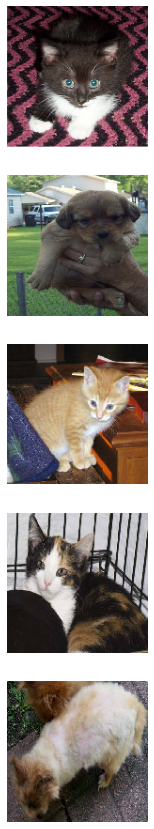

In [4]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [5]:
train_image_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)


Found 2000 images belonging to 2 classes.


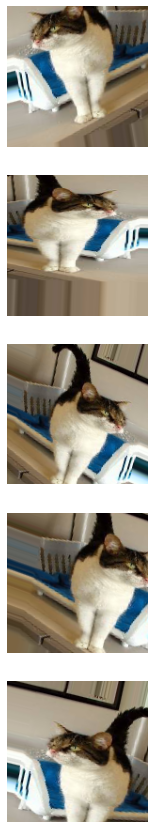

In [6]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [119]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same',input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3),activation='relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3),activation='relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2))



model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 18, 18, 128)     

In [120]:
history = model.fit(train_data_gen,
                    epochs=epochs, validation_data=val_data_gen,validation_steps=8)

Epoch 1/15
16/16 [==============================] - 56s 3s/step - loss: 0.9323 - accuracy: 0.4950 - val_loss: 0.6921 - val_accuracy: 0.5960
Epoch 2/15
16/16 [==============================] - 60s 4s/step - loss: 0.6860 - accuracy: 0.5550 - val_loss: 0.6817 - val_accuracy: 0.5060
Epoch 3/15
16/16 [==============================] - 56s 3s/step - loss: 0.6698 - accuracy: 0.5800 - val_loss: 0.6350 - val_accuracy: 0.6170
Epoch 4/15
16/16 [==============================] - 57s 4s/step - loss: 0.6450 - accuracy: 0.6350 - val_loss: 0.6197 - val_accuracy: 0.6470
Epoch 5/15
16/16 [==============================] - 56s 3s/step - loss: 0.6168 - accuracy: 0.6570 - val_loss: 0.5989 - val_accuracy: 0.6790
Epoch 6/15
16/16 [==============================] - 57s 4s/step - loss: 0.6085 - accuracy: 0.6590 - val_loss: 0.5815 - val_accuracy: 0.6890
Epoch 7/15
16/16 [==============================] - 58s 4s/step - loss: 0.5963 - accuracy: 0.6845 - val_loss: 0.5705 - val_accuracy: 0.6800
Epoch 8/15
16/16 [==

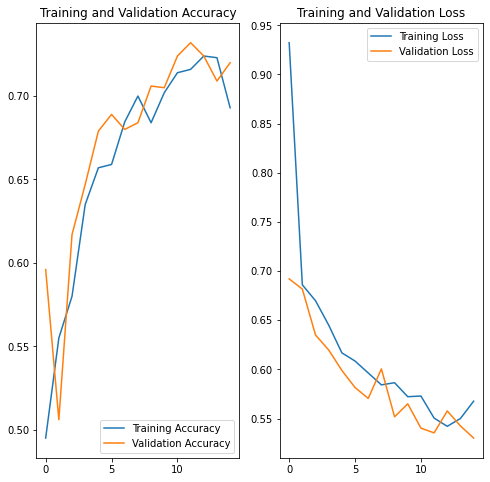

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [122]:
test_data_gen

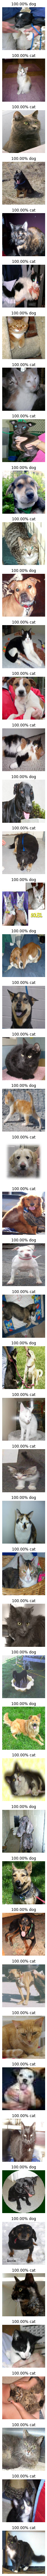

In [127]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_data_gen.next()

predictions = model.predict(test_data_gen)
probabilities = [1 if p[0]<p[1] else 0 for p in predictions]

plotImages(image_batch,probabilities)


In [128]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified*100, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
